In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing

In this section, we'll explore summary statistics for the global energy consumption dataset. We'll start by loading the data and reviewing its structure to understand what columns and values are available for analysis.

In [2]:
df = pd.read_csv('../data/global_energy_consumption.csv')
df.head()

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


In [3]:
print(df.columns.tolist())

['Country', 'Year', 'Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 'Industrial Energy Use (%)', 'Household Energy Use (%)', 'Carbon Emissions (Million Tons)', 'Energy Price Index (USD/kWh)']


In [4]:
summary = df.describe(include='all')
print(summary)

       Country          Year  Total Energy Consumption (TWh)  \
count    10000  10000.000000                    10000.000000   
unique      10           NaN                             NaN   
top        USA           NaN                             NaN   
freq      1053           NaN                             NaN   
mean       NaN   2012.151400                     5142.564425   
std        NaN      7.155236                     2848.754040   
min        NaN   2000.000000                      100.480000   
25%        NaN   2006.000000                     2713.882500   
50%        NaN   2012.000000                     5190.850000   
75%        NaN   2018.000000                     7579.977500   
max        NaN   2024.000000                     9999.260000   

        Per Capita Energy Use (kWh)  Renewable Energy Share (%)  \
count                  10000.000000                10000.000000   
unique                          NaN                         NaN   
top                           

Checking for missing(null) data

In [5]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
dtype: int64


No null Data, we can move on to data types and consistancy,

In [6]:
print(df.dtypes)

Country                             object
Year                                 int64
Total Energy Consumption (TWh)     float64
Per Capita Energy Use (kWh)        float64
Renewable Energy Share (%)         float64
Fossil Fuel Dependency (%)         float64
Industrial Energy Use (%)          float64
Household Energy Use (%)           float64
Carbon Emissions (Million Tons)    float64
Energy Price Index (USD/kWh)       float64
dtype: object


Data types are correct. We can move on to Normalization.

In normalization I will use Min/Max for Visualization, and later will opt to StandardScaler For the next Regression and Clustering.

In [7]:
scaler = preprocessing.MinMaxScaler()

# Select the colomns to normalize
num_cols = [
    'Total Energy Consumption (TWh)',
    'Per Capita Energy Use (kWh)',
    'Carbon Emissions (Million Tons)',
    'Energy Price Index (USD/kWh)'
]

df_minmax = df.copy()
df_minmax[num_cols] = scaler.fit_transform(df[num_cols])

# checked the values if they are normalized between 0 and 1 correctly using describe 
#print(df_minmax[num_cols].describe())
print("Head before Min-Max Normalization:")
display(df.head())
print("Head after Min-Max Normalization:")
display(df_minmax.head())


Head before Min-Max Normalization:


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


Head after Min-Max Normalization:


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,0.952127,0.844650,13.70,70.47,45.18,19.96,0.750797,0.155556
1,Germany,2020,0.790158,0.729473,33.63,41.95,34.32,22.27,0.538016,0.066667
2,Russia,2002,0.659630,0.831896,10.82,39.32,53.66,26.44,0.168800,0.466667
3,Brazil,2010,0.856642,0.211547,73.24,16.71,30.55,27.60,0.220961,0.933333
4,Canada,2006,0.075605,0.640352,73.60,74.86,42.39,23.43,0.159992,0.955556


Visualization

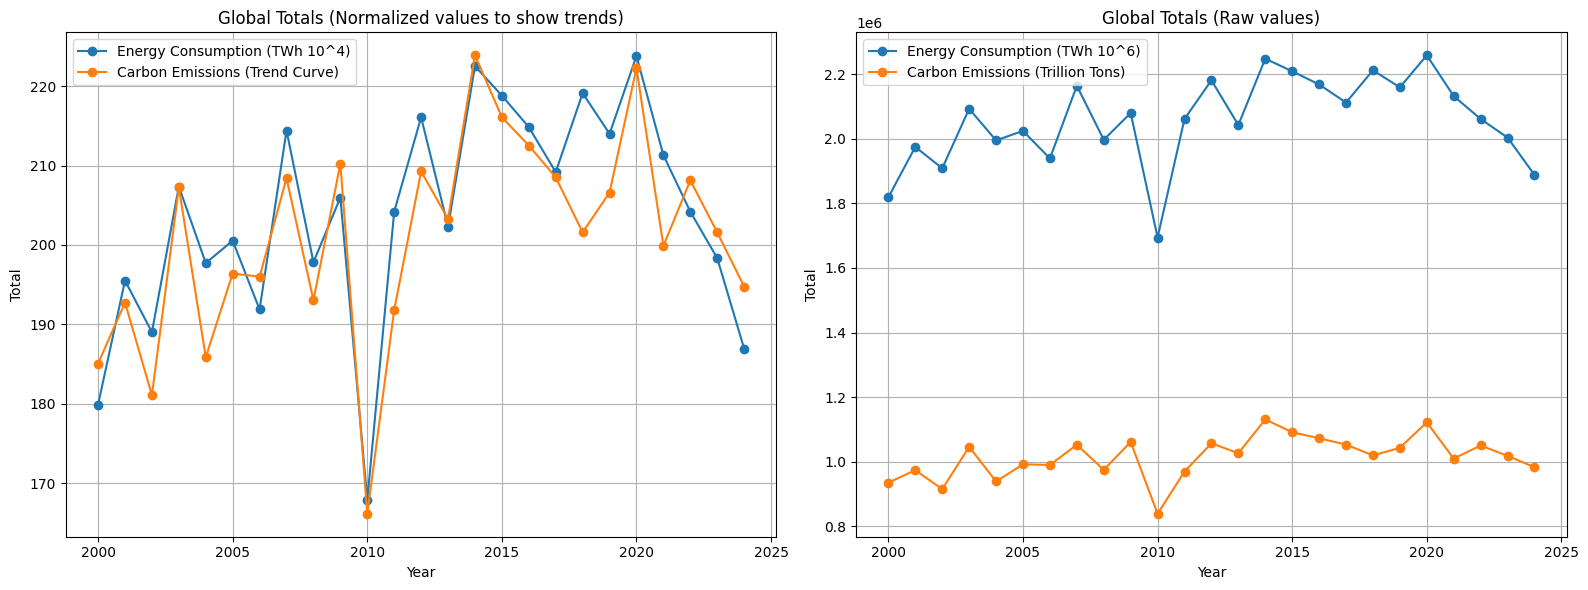

In [8]:
df_yearly = df_minmax.groupby('Year').agg({
    'Total Energy Consumption (TWh)': 'sum',
    'Carbon Emissions (Million Tons)': 'sum'
}).reset_index()

df_yearly_row = df.groupby('Year').agg({
    'Total Energy Consumption (TWh)': 'sum',
    'Carbon Emissions (Million Tons)': 'sum'
}).reset_index()

fig, axes = plt.subplots(1,2, figsize=(16, 6))
axes[0].plot(df_yearly['Year'], df_yearly['Total Energy Consumption (TWh)'], label='Energy Consumption (TWh 10^4)', marker='o')
axes[0].plot(df_yearly['Year'], df_yearly['Carbon Emissions (Million Tons)'], label='Carbon Emissions (Trend Curve)', marker='o')
axes[0].set_title('Global Totals (Normalized values to show trends)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(df_yearly_row['Year'], df_yearly_row['Total Energy Consumption (TWh)'], label='Energy Consumption (TWh 10^6)', marker='o')
axes[1].plot(df_yearly_row['Year'], df_yearly_row['Carbon Emissions (Million Tons)'], label='Carbon Emissions (Trillion Tons)', marker='o')
axes[1].set_title('Global Totals (Raw values)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

I decided to present both the normalized and raw plots: the normalized plot highlights the trend and correlation between energy consumption and carbon emissions more clearly, while the raw plot shows the actual numerical values of both variables.

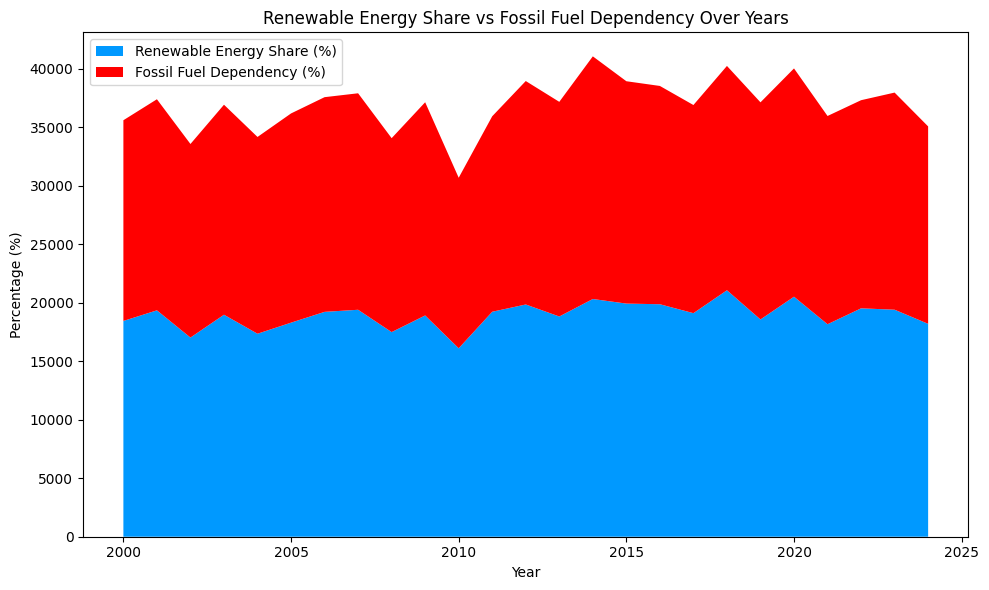

In [9]:
df_area = df.groupby('Year').agg({
    'Renewable Energy Share (%)': 'sum',
    'Fossil Fuel Dependency (%)': 'sum'
}).reset_index()


renewable = df_area['Renewable Energy Share (%)']
fossil = df_area['Fossil Fuel Dependency (%)']
years = df_area['Year']

plt.figure(figsize=(10, 6))
plt.stackplot(years, renewable, fossil, labels=['Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)'], colors=["#0099FF", "#FF0000"])
plt.title('Renewable Energy Share vs Fossil Fuel Dependency Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


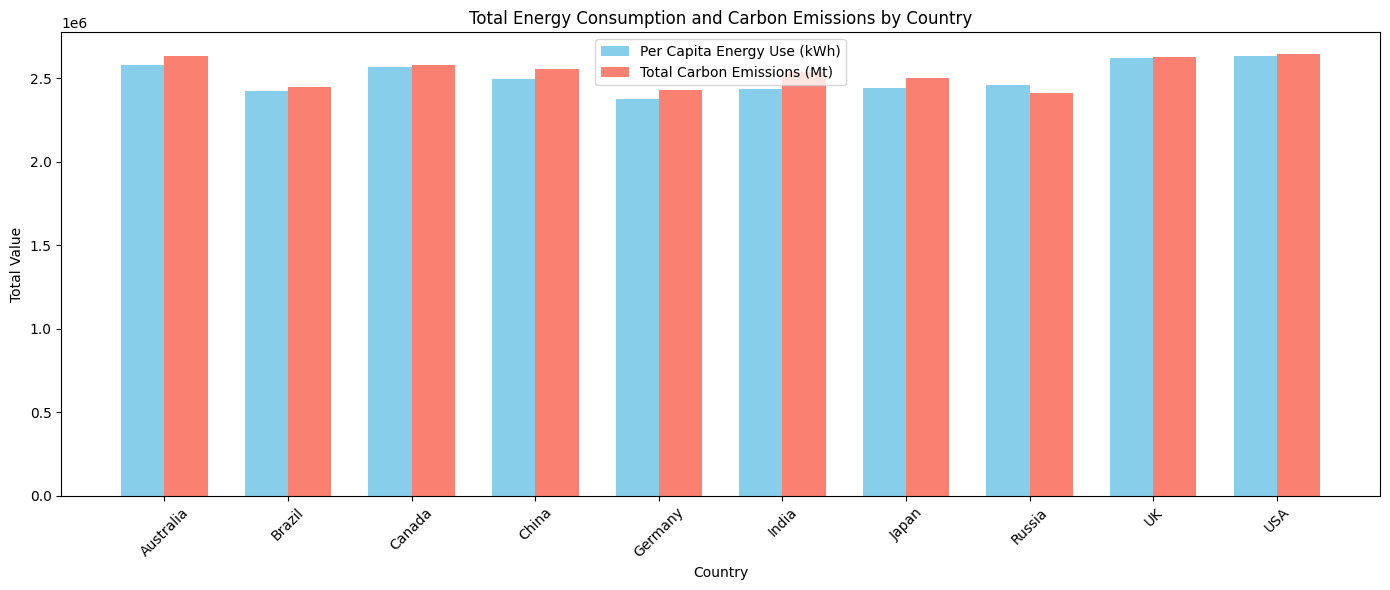

In [10]:
df_country_year = df.groupby(['Country']).agg({
    'Per Capita Energy Use (kWh)': 'sum',
    'Carbon Emissions (Million Tons)': 'sum'
}).reset_index()
countries = df_country_year['Country']

# Extract values for plotting
energy = df_country_year['Per Capita Energy Use (kWh)']
emissions = df_country_year['Carbon Emissions (Million Tons)']

x = np.arange(len(countries))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(14, 6))
bars2 = ax.bar(x - width/2, energy/10, width, label='Per Capita Energy Use (kWh)', color='skyblue')
bars1 = ax.bar(x + width/2, emissions, width, label='Total Carbon Emissions (Mt)', color='salmon')

# Labels/ticks
ax.set_xlabel('Country')
ax.set_ylabel('Total Value')
ax.set_title('Total Energy Consumption and Carbon Emissions by Country')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


In [11]:
# Opted for median to reduce the impact of outliers, and it gives a better representation of cross checked values
country_renewable_percent = df.groupby('Country')['Renewable Energy Share (%)'].median().reset_index()
# Sort for top and bottom 5
top5 = country_renewable_percent.sort_values('Renewable Energy Share (%)', ascending=False).head(5)
bottom5 = country_renewable_percent.sort_values('Renewable Energy Share (%)', ascending=True).head(5)

print("Top 5 Countries in Renewable Energy Adoption (%):")
print(top5)

print("\nBottom 5 Countries in Renewable Energy Adoption (%):")
print(bottom5)
#here there is an obious error in the bottom 5 as some countries have a negative renewable energy share which is not possible so i will try to filter them out and see if it improves the data by cleaning outliers and obvious errors

Top 5 Countries in Renewable Energy Adoption (%):
  Country  Renewable Energy Share (%)
9     USA                      48.140
2  Canada                      48.020
5   India                      47.785
7  Russia                      47.770
1  Brazil                      46.985

Bottom 5 Countries in Renewable Energy Adoption (%):
     Country  Renewable Energy Share (%)
4    Germany                      45.440
8         UK                      46.025
3      China                      46.320
0  Australia                      46.580
6      Japan                      46.950


In [182]:

# some entries have conflicting values of Renewable Energy Share (%) and Fossil Fuel Dependency (%) making the sum > 100% i will remove 
# them to try to see if it improves the model as currently the model is not performing well

Clean_percentage = df[(df['Renewable Energy Share (%)'] + df['Fossil Fuel Dependency (%)'] <= 100) & ((df['Renewable Energy Share (%)'] + df['Fossil Fuel Dependency (%)'] >= 90))]

country_renewable_percent = Clean_percentage.groupby('Country')['Renewable Energy Share (%)'].median().reset_index()
# Sort for top and bottom 5
top5 = country_renewable_percent.sort_values('Renewable Energy Share (%)', ascending=False).head(5)
bottom5 = country_renewable_percent.sort_values('Renewable Energy Share (%)', ascending=True).head(5)

# Display results
print("Top 5 Countries in Renewable Energy Adoption (%):")
print(top5)

print("\nBottom 5 Countries in Renewable Energy Adoption (%):")
print(bottom5)

Top 5 Countries in Renewable Energy Adoption (%):
   Country  Renewable Energy Share (%)
2   Canada                      54.970
7   Russia                      52.035
1   Brazil                      51.750
8       UK                      50.930
4  Germany                      48.400

Bottom 5 Countries in Renewable Energy Adoption (%):
     Country  Renewable Energy Share (%)
3      China                      43.780
5      India                      44.450
6      Japan                      45.210
0  Australia                      45.525
9        USA                      46.670


There is an issue that i realized while calculating the sum of total energy used for each country is that having for example the consumption of canada approximitly equal to the consumption of India is illogical, I have tried to review that entries try to find a pattern that is leading to this issue(multiple entry of each country per year).

I couldn't decide on weather i should use mean/median for the entries for the same year for each country or use the maximum consumption of each country per year( it won't work as there are multiple entries which are approximitly equal).

To make sure that I wasn't misinterpriting the values, I have compared the total consumption of each country in 2023 and total consumption of Energy of each country to multiple sources including Canada Energy Regulator, USA Energy Information Adminstration(https://www.eia.gov/), Our World in Data and Carbon Brief.

In [183]:
df_2023 = df[df['Year'] == 2023]
df_2023_country = df_2023.groupby('Country')['Total Energy Consumption (TWh)'].median().reset_index()

print(df_2023_country)
print("the total consumption of energy for each country isn't correct")

     Country  Total Energy Consumption (TWh)
0  Australia                        5181.285
1     Brazil                        5562.720
2     Canada                        5119.670
3      China                        4911.220
4    Germany                        4374.045
5      India                        5261.810
6      Japan                        3861.805
7     Russia                        4760.095
8         UK                        4778.590
9        USA                        5580.770
the total consumption of energy for each country isn't correct


In [184]:
df_country_median = df_2023.groupby('Country')['Total Energy Consumption (TWh)'].mean().reset_index()

print(df_country_median)
print("the total consumption of energy for each country isn't correct")

     Country  Total Energy Consumption (TWh)
0  Australia                     4960.124167
1     Brazil                     5223.586897
2     Canada                     5273.324091
3      China                     4953.820698
4    Germany                     4415.392895
5      India                     5353.260811
6      Japan                     4576.422727
7     Russia                     4921.034200
8         UK                     4821.835000
9        USA                     5298.929524
the total consumption of energy for each country isn't correct


In [185]:
df_total = df.groupby('Country')['Total Energy Consumption (TWh)'].agg(['mean', 'median', 'sum']).reset_index()

print(df_total)
print("the total consumption of energy for each country isn't correct")

     Country         mean    median         sum
0  Australia  5046.237081  5087.060  5152208.06
1     Brazil  4858.032318  4717.805  4673427.09
2     Canada  5086.422684  5163.930  5172891.87
3      China  5036.665137  5019.090  4961115.16
4    Germany  5184.558661  5251.150  5034206.46
5      India  5266.872149  5373.285  5245804.66
6      Japan  5279.490111  5430.170  5247813.17
7     Russia  5058.404550  5059.200  4891477.20
8         UK  5262.176180  5396.175  5441090.17
9        USA  5323.466676  5436.990  5605610.41
the total consumption of energy for each country isn't correct


I have researched way to fix the data and tried to use aggregate hybrid method and it still didn't get near the values of consumption seen in other data sets.

When a dataset has multiple entries for the same country and year, some rows may be:
Duplicates or repeated estimates — essentially the same value repeated multiple times.
Subcomponents or partial entries — different pieces of the total energy consumption that should be summed.
A simple sum or median alone can give wrong results:
Sum → overcounts duplicates.
Median → undercounts subcomponents.

I will move on to part 3 and will use Standard Scaler.

In [196]:
from sklearn.preprocessing import StandardScaler
# Prepare features and target for regression
SSD1 = df.copy()
agg_df1 = SSD1[(SSD1['Renewable Energy Share (%)'] + SSD1['Fossil Fuel Dependency (%)'] <= 100) & ((SSD1['Renewable Energy Share (%)'] + SSD1['Fossil Fuel Dependency (%)'] >= 40))]

agg_df1 = agg_df1.groupby(['Country', 'Year'], as_index=False).median()
features = ['Total Energy Consumption (TWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)']

scaler = StandardScaler()
agg_df1['Total Energy Consumption (TWh)'] = scaler.fit_transform(agg_df1[['Total Energy Consumption (TWh)']])

X1 = agg_df1[features]
y1 = agg_df1['Carbon Emissions (Million Tons)']
print(X1)

     Total Energy Consumption (TWh)  Renewable Energy Share (%)  \
0                         -1.592481                      47.420   
1                         -0.071718                      26.355   
2                          2.633114                      36.640   
3                          0.332561                      37.760   
4                          0.470892                      28.950   
..                              ...                         ...   
245                        0.597182                      25.055   
246                       -0.016912                      31.970   
247                       -0.243664                      28.945   
248                        1.396440                      45.740   
249                       -1.373436                      42.675   

     Fossil Fuel Dependency (%)  
0                        36.930  
1                        46.750  
2                        28.490  
3                        29.725  
4                        

Due to multiple entries for each Country each year with no Sub Categories of types or usage or any explanation of why they are there i decided to use the mean of these values to get a consistant values for regression.

In [197]:

# Prepare features and target for regression
SSD = df.copy()
agg_df = SSD.groupby(['Country', 'Year'], as_index=False).mean()
features = ['Total Energy Consumption (TWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)']

agg_df['Total Energy Consumption (TWh)'] = scaler.fit_transform(agg_df[['Total Energy Consumption (TWh)']])
X = agg_df[features]
y = agg_df['Carbon Emissions (Million Tons)']
print(X)
print(y)

     Total Energy Consumption (TWh)  Renewable Energy Share (%)  \
0                         -2.545834                   51.231026   
1                         -0.082574                   40.703500   
2                          2.672884                   46.524286   
3                          0.417672                   49.669667   
4                          1.290435                   46.077778   
..                              ...                         ...   
245                        1.046337                   51.208667   
246                        0.246893                   50.460588   
247                       -0.117737                   42.723409   
248                        0.315052                   48.973095   
249                       -0.797651                   50.989189   

     Fossil Fuel Dependency (%)  
0                     47.349487  
1                     49.094250  
2                     37.496000  
3                     48.977667  
4                     44.

In [198]:
from sklearn.linear_model import LinearRegression,  Lasso, ElasticNetCV
reg = LinearRegression()
reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [199]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = reg.predict(X)
for name, coef in zip(features, reg.coef_):
    print(f"{name}: {coef:.4f}")
print("Intercept:", reg.intercept_)
print("R² score:", r2_score(y, y_pred))

Total Energy Consumption (TWh): 1.5899
Renewable Energy Share (%): 3.6979
Fossil Fuel Dependency (%): 8.7780
Intercept: 1967.3137068729661
R² score: 0.0232019506527269


The linear regression model predicts carbon emissions based on total energy consumption, renewable energy share, and fossil fuel dependency:

- Total Energy Consumption (TWh): 1.5891
- Renewable Energy Share (%): 3.70(isn't correct as it should be negative)
- Fossil Fuel Dependency (%): 8.78
- Intercept: 1967.31
- R² score: 0.023 (model explains only 2.3% of variance)

Model coefficients are interpretable, but the explanatory power is low. This suggest that either I am doing a mistake in scaling the data or the data itself is flawed.

In [200]:
# With clean trial i got more realistic values for the coefficients but still the model isn't performing well
reg1 = LinearRegression()
reg1.fit(X1, y1)

y_pred1 = reg1.predict(X1)
for name, coef in zip(features, reg1.coef_):
    print(f"{name}: {coef:.4f}")
print("Intercept:", reg1.intercept_)
print("R² score:", r2_score(y1, y_pred1))

Total Energy Consumption (TWh): -5.8474
Renewable Energy Share (%): -4.0606
Fossil Fuel Dependency (%): 9.0239
Intercept: 2392.275789788027
R² score: 0.022127820723871428


As asked we need to train forcast on histrocial data before 2022 and predict the Price Index for 2023-2024

In [201]:
train_data = df[df['Year'] <= 2022]
predict_data = df[df['Year'].isin([2023, 2024])]
features = ['Total Energy Consumption (TWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)']
X_train = train_data.groupby('Year')[features].median()
y_train = train_data.groupby('Year')['Energy Price Index (USD/kWh)'].median()
X_predict = predict_data[features]

reg_price = LinearRegression()
reg_price.fit(X_train, y_train)

y_predict = reg_price.predict(X_predict)


y_train_pred = reg_price.predict(X_train)
residuals = y_train - y_train_pred
std_error = np.std(residuals)

# Confidence interval: pred ± 1.96*std_error (for ~95% confidence)
conf_int_lower = y_predict - 1.96*std_error
conf_int_upper = y_predict + 1.96*std_error

results = {
    2023: {"preds": [], "ci_lower": [], "ci_upper": []},
    2024: {"preds": [], "ci_lower": [], "ci_upper": []}
}

for i, year in enumerate(predict_data['Year']):
    results[year]["preds"].append(y_predict[i])
    results[year]["ci_lower"].append(conf_int_lower[i])
    results[year]["ci_upper"].append(conf_int_upper[i])

In [202]:
for year in [2023, 2024]:
    mean_pred = np.median(results[year]["preds"])
    mean_lower = np.median(results[year]["ci_lower"])
    mean_upper = np.median(results[year]["ci_upper"])
    print(f"Year {year}: Global Predicted Price = {mean_pred:.3f} USD/kWh, 95% CI = [{mean_lower:.3f}, {mean_upper:.3f}]")

Year 2023: Global Predicted Price = 0.278 USD/kWh, 95% CI = [0.250, 0.307]
Year 2024: Global Predicted Price = 0.276 USD/kWh, 95% CI = [0.247, 0.304]


In [203]:
y_predict_2023 = results[2023]["preds"]
y_predict_2024 = results[2024]["preds"]

actual_2023 = df[df['Year'] == 2023]['Energy Price Index (USD/kWh)']
actual_2024 = df[df['Year'] == 2024]['Energy Price Index (USD/kWh)']

median_actual_2023 = actual_2023.median()
median_actual_2024 = actual_2024.median()
print(median_actual_2023, median_actual_2024)

0.28 0.27


In [204]:

print("mse_2023", mse_2023 := mean_squared_error(actual_2023, y_predict_2023))
print("mse_2024", mse_2024 := mean_squared_error(actual_2024, y_predict_2024))

mse_2023 0.020525947833703446
mse_2024 0.019813702720774352


I found when I compared the actual energy prices for each country in 2023 and 2024 to my global predictions:

Predicted global median:
My model’s median prediction for 2023 was 0.278 USD/kWh and for 2024 it was 0.276 USD/kWh.

Actual global mean:
The real global average for 2023 was 0.28 USD/kWh, and for 2024 it was 0.27 USD/kWh.

MSE:
checked the MSE (mean squared error) for my predictions—turns out it’s between 0.0205 for 2023 and 0.019 for 2024, which is relatively low. Which show that the pridiction is close to the actual prices.

Takeaway:
Using the median instead of the mean for global prediction worked really well—especially since it’s less sensitive to those high outlier countries.
The predicted median ended up almost matching the real average price!



In [222]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,1.215174,-1.366645,1.264103,45.18,19.96,0.863717,0.12
1,Germany,2020,7922.08,0.813902,-0.556566,-0.147653,34.32,22.27,0.124275,0.08
2,Russia,2002,6630.01,1.170736,-1.483706,-0.277839,53.66,26.44,-1.158798,0.26
3,Brazil,2010,8580.19,-0.990526,1.053431,-1.397047,30.55,27.60,-0.977532,0.47
4,Canada,2006,848.88,0.503409,1.068064,1.481411,42.39,23.43,-1.189409,0.48


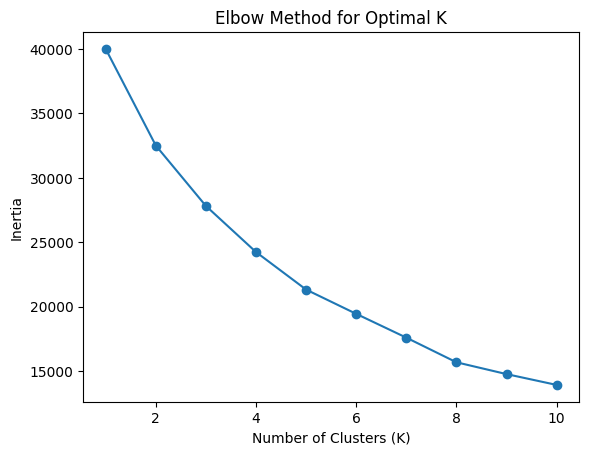

In [229]:
# 1. Grouping clusters based on features
features = ['Per Capita Energy Use (kWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 'Carbon Emissions (Million Tons)']

Cluster_data = df.copy()
Cluster_data = Cluster_data.dropna(subset=features)

Cluster_data[features] = scaler.fit_transform(Cluster_data[features])
display(Cluster_data.head())

X_scaled = Cluster_data[features]  # Use your scaled features

K_range = range(1, 11)  # 10 values
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(list(K_range), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
Cluster_data['Cluster'] = kmeans.fit_predict(Cluster_data[features])


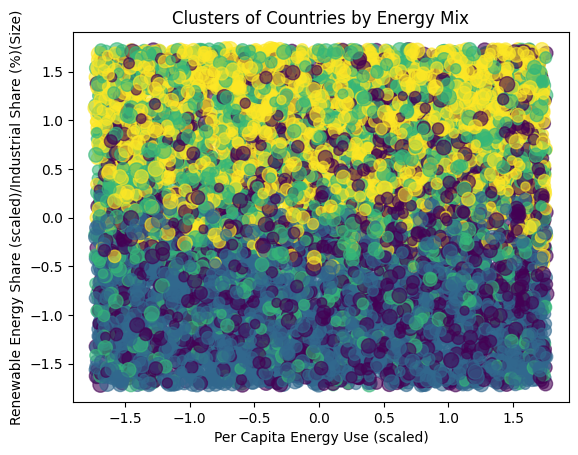

         Per Capita Energy Use (kWh)  Renewable Energy Share (%)  \
Cluster                                                            
0                           0.109750                   -0.212268   
1                          -0.071245                   -0.958305   
2                          -0.055535                    0.310030   
3                           0.016454                    0.878406   

         Fossil Fuel Dependency (%)  Carbon Emissions (Million Tons)  
Cluster                                                               
0                          0.810886                        -0.933588  
1                         -0.738863                         0.286641  
2                          0.802463                         0.915546  
3                         -0.865126                        -0.255430  


In [ ]:
plt.scatter(
    Cluster_data['Per Capita Energy Use (kWh)'],
    Cluster_data['Renewable Energy Share (%)'],
    s=Cluster_data['Industrial Energy Use (%)']*2,  # size by industrial share
    c=Cluster_data['Cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('Per Capita Energy Use (scaled)')
plt.ylabel('Renewable Energy Share (scaled)/Industrial Share (%)(Size)')
plt.title('Clusters of Countries by Energy Mix')
plt.show()

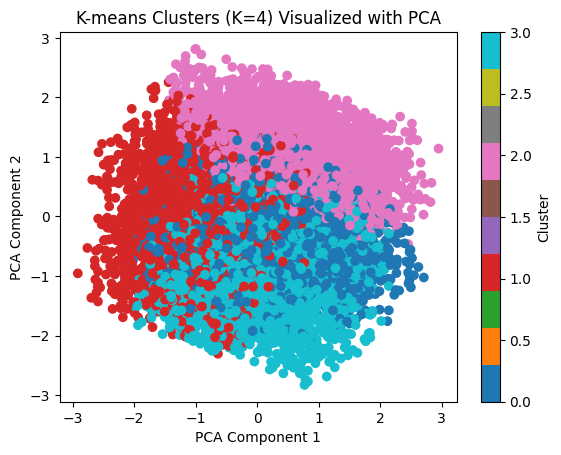

In [240]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(Cluster_data[features])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Cluster_data['Cluster'], cmap='tab10')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clusters (K=4) Visualized with PCA')
plt.colorbar(label='Cluster')
plt.show()

Cluster 1: High Energy, High Industry, Low Renewables
Economic implication:
Likely countries with strong manufacturing bases, possibly export-driven.
High energy costs, potentially more vulnerable to fossil fuel price fluctuations.
May face environmental or regulatory challenges.


Cluster 2: Low Energy, High Renewables, Low Industry
Economic implication:
Countries with service-oriented or agrarian economies.
Lower energy costs, possibly more stable long-term due to renewables.
May be less industrialized, lower GDP per capita.


Cluster 3: High Energy, High Renewables, Balanced Industry
Economic implication:
Developed economies investing in green tech/innovation.
Competitive advantage in future energy markets.
Potential for economic growth with sustainability.


Cluster 4: Low Energy, Low Industry, Low Renewables
Economic implication:
Developing or transitional economies.
May need investment in infrastructure and renewables.
Could face challenges in scaling up production or improving living standards.


Mehtod for interpritation and implimentation of Kmean Clusters:
Collected Data:
You gathered energy-related features for several countries, including:

Per Capita Energy Use (kWh)
Renewable Energy Share (%)
Industrial Share (%)

Preprocessed the Data:
You cleaned and standardized your data to ensure fair clustering.

Determined the Number of Clusters (K):
Used the elbow plot method to find the optimal number of clusters (K=4).

Applied K-means Clustering:
Grouped countries based on similarities in their energy profiles.

Visualized Results:

Used PCA to reduce features to 2D for easy visualization.
Created scatter plots, coloring countries by cluster.
Analyzed Cluster Profiles:
Checked average values for each cluster to see what makes them unique.

Interpreted Economic Implications:
Linked each cluster’s characteristics to possible economic scenarios.

